## Data Wrangling II
Create an “Academic performance” dataset of students and perform the following operations using
Python.
1. Scan all variables for missing values and inconsistencies. If there are missing values and/or
inconsistencies, use any of the suitable techniques to deal with them.
2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable
techniques to deal with them.
3. Apply data transformations on at least one of the variables. The purpose of this
transformation should be one of the following reasons: to change the scale for better
understanding of the variable, to convert a non-linear relation into a linear one, or to
decrease the skewness and convert the distribution into a normal distribution. 

In [37]:
import pandas as pd
import numpy as np

In [38]:

students={
    'Age':[20,22,23,21,21,22,21,20,23,21],
    'Name':['a','b','c','d','e','f','g','h','i','j'],
    'Sex':['m','f',np.nan,'m','f',np.nan,'m','f',np.nan,'m'],
    'Marks':[91,35,95,40,np.NAN,75,80,74,70,80]
}

#df=pd.read_csv("StudentsPerformanceTest1.csv")

In [39]:

df=pd.DataFrame(students)
df

,Age,Name,Sex,Marks
0,20,a,m,91.0
1,22,b,f,35.0
2,23,c,NaN,95.0
3,21,d,m,40.0
4,21,e,f,NaN
5,22,f,NaN,75.0
6,21,g,m,80.0
7,20,h,f,74.0
8,23,i,NaN,70.0
9,21,j,m,80.0


In [40]:
#1)Scan all variables for missing values and inconsistencies. 
#      If there are missing values and/or inconsistencies, use any of the suitable techniques to deal with them.

In [41]:
df.isnull()

,Age,Name,Sex,Marks
0,False,False,False,False
1,False,False,False,False
2,False,False,True,False
3,False,False,False,False
4,False,False,False,True
5,False,False,True,False
6,False,False,False,False
7,False,False,False,False
8,False,False,True,False
9,False,False,False,False


In [42]:
df.isnull().sum()

Age      0
Name     0
Sex      3
Marks    1
dtype: int64

In [43]:
df['Sex'].mode()[0]

'm'

In [44]:
df['Sex']=df['Sex'].fillna(df['Sex'].mode()[0])

In [45]:
df

,Age,Name,Sex,Marks
0,20,a,m,91.0
1,22,b,f,35.0
2,23,c,m,95.0
3,21,d,m,40.0
4,21,e,f,NaN
5,22,f,m,75.0
6,21,g,m,80.0
7,20,h,f,74.0
8,23,i,m,70.0
9,21,j,m,80.0


In [46]:
#to remove null values from marks we take average

df['Marks']=df['Marks'].fillna(df['Marks'].mean())

In [47]:
df

,Age,Name,Sex,Marks
0,20,a,m,91.000000
1,22,b,f,35.000000
2,23,c,m,95.000000
3,21,d,m,40.000000
4,21,e,f,71.111111
5,22,f,m,75.000000
6,21,g,m,80.000000
7,20,h,f,74.000000
8,23,i,m,70.000000
9,21,j,m,80.000000


In [48]:
#2.Scan all numeric variables for outliers. If there are outliers, use any of the suitable techniques to deal with them.

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\banka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


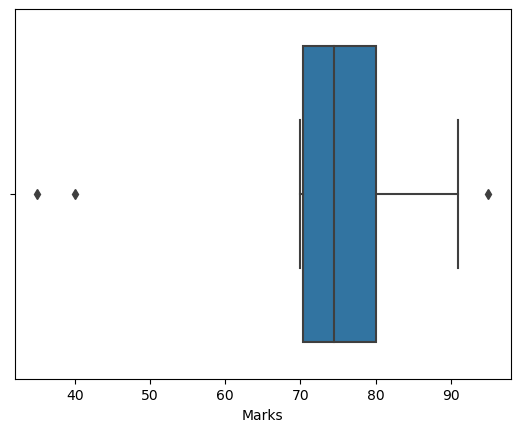

In [50]:
sns.boxplot(df["Marks"])
plt.show()

In [51]:
maxi=df['Marks'].quantile(0.9)

In [52]:
maxi

91.4

In [53]:
mini=df['Marks'].quantile(0.1)

In [54]:
mini

39.5

In [55]:
df=df[((df['Marks']>mini) & (df['Marks']<maxi))]

df

,Age,Name,Sex,Marks
0,20,a,m,91.000000
3,21,d,m,40.000000
4,21,e,f,71.111111
5,22,f,m,75.000000
6,21,g,m,80.000000
7,20,h,f,74.000000
8,23,i,m,70.000000
9,21,j,m,80.000000


In [56]:
#3.  Apply data transformations on at least one of the variables. 

In [57]:
df['Marks']=np.log(df['Marks'])
df

C:\Users\banka\AppData\Local\Temp\ipykernel_9036\120611996.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Marks']=np.log(df['Marks'])


,Age,Name,Sex,Marks
0,20,a,m,4.510860
3,21,d,m,3.688879
4,21,e,f,4.264244
5,22,f,m,4.317488
6,21,g,m,4.382027
7,20,h,f,4.304065
8,23,i,m,4.248495
9,21,j,m,4.382027
